In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# 1. Parâmetros das distribuições
media_vermelha = 0
media_azul = 5
desvio_padrao = 1

In [4]:
# 2. Simular dados da distribuição azul
np.random.seed(42)  # para resultados reprodutíveis
num_sequencias = 100
tamanho_sequencia = 3

# 100 sequências de 3 valores da azul
sequencias = np.random.normal(loc=media_azul, scale=desvio_padrao, size=(num_sequencias, tamanho_sequencia))

print(len(sequencias))

# 3. Calcular a média de cada sequência
medias_sequencias = np.mean(sequencias, axis=1)

# 4. Calcular p-values usando a distribuição vermelha
# A média da amostra sob H0 deve seguir uma normal com:
# média 0 e desvio padrão reduzido (σ/√n)
desvio_padrao_amostral = desvio_padrao / np.sqrt(tamanho_sequencia)

# p-valor: P(observar uma média tão extrema ou mais)
p_values = 1 - norm.cdf(medias_sequencias, loc=media_vermelha, scale=desvio_padrao_amostral)

# 5. Calcular a taxa de falsos negativos (p-valor > 5%)
falsos_negativos = np.sum(p_values > 0.05)
taxa_falsos_negativos = falsos_negativos / num_sequencias

# 6. Mostrar os resultados
print(f"Taxa de falsos negativos: {taxa_falsos_negativos:.2%}")

100
Taxa de falsos negativos: 0.00%


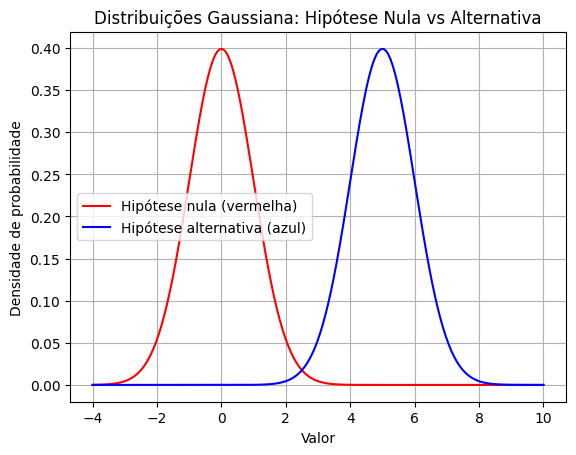

In [24]:
# 7. Plotar as duas distribuições para ilustrar
x = np.linspace(-4, 10, 500)
plt.plot(x, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao), 'r-', label='Hipótese nula (vermelha)')
plt.plot(x, norm.pdf(x, loc=media_azul, scale=desvio_padrao), 'b-', label='Hipótese alternativa (azul)')
#plt.axvline(x=medias_sequencias.mean(), color='purple', linestyle='--', label='Média das sequências azuis')
plt.legend()
plt.title('Distribuições Gaussiana: Hipótese Nula vs Alternativa')
plt.xlabel('Valor')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()


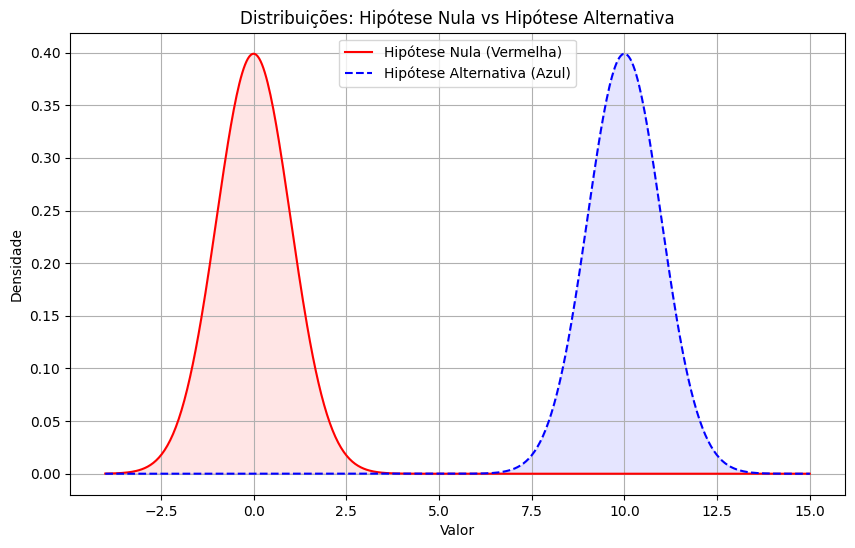

Exemplos de sequências sorteadas da distribuição azul (alternativa):
Sequência 1: [10.49671415  9.8617357  10.64768854] -> Média: 10.34
Sequência 2: [11.52302986  9.76584663  9.76586304] -> Média: 10.35
Sequência 3: [11.57921282 10.76743473  9.53052561] -> Média: 10.63
Sequência 4: [10.54256004  9.53658231  9.53427025] -> Média: 9.87
Sequência 5: [10.24196227  8.08671976  8.27508217] -> Média: 8.87

Exemplo de cálculo de p-valor para a primeira sequência:
Média da sequência: 10.34
P-valor calculado: 0.00000


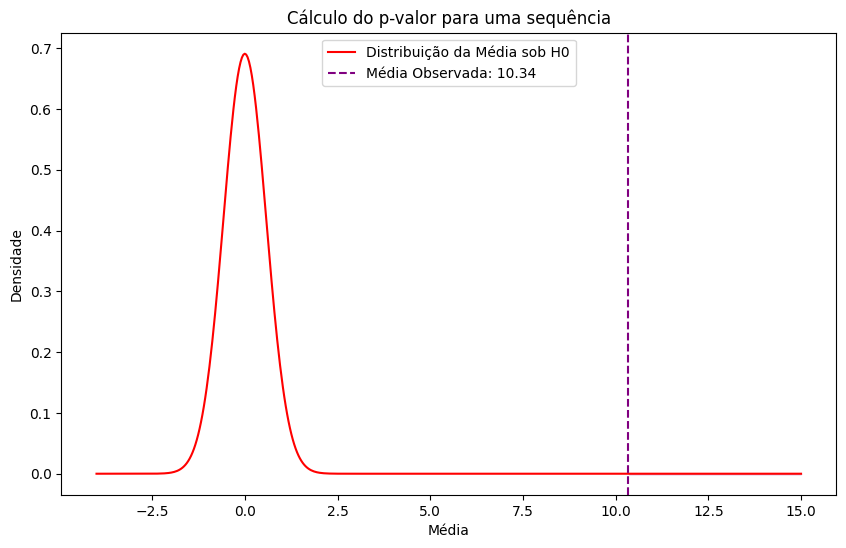


Taxa de falsos negativos: 0.00%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Parâmetros
media_vermelha = 0
media_azul = 10
desvio_padrao = 1
tamanho_sequencia = 3
num_sequencias = 100

np.random.seed(42)  # reprodutibilidade

# 2. Simular dados da distribuição azul
sequencias = np.random.normal(loc=media_azul, scale=desvio_padrao, size=(num_sequencias, tamanho_sequencia))
medias_sequencias = np.mean(sequencias, axis=1)

# 3. Mostrar as duas distribuições
x = np.linspace(-4, 15, 500)
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao), 'r-', label='Hipótese Nula (Vermelha)')
plt.plot(x, norm.pdf(x, loc=media_azul, scale=desvio_padrao), 'b--', label='Hipótese Alternativa (Azul)')
plt.fill_between(x, 0, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao), color='red', alpha=0.1)
plt.fill_between(x, 0, norm.pdf(x, loc=media_azul, scale=desvio_padrao), color='blue', alpha=0.1)
plt.title('Distribuições: Hipótese Nula vs Hipótese Alternativa')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

# 4. Mostrar algumas sequências sorteadas
print("Exemplos de sequências sorteadas da distribuição azul (alternativa):")
for i in range(5):  # mostrar só 5 exemplos
    print(f"Sequência {i+1}: {sequencias[i]} -> Média: {medias_sequencias[i]:.2f}")

# 5. Cálculo dos p-values
desvio_padrao_amostral = desvio_padrao / np.sqrt(tamanho_sequencia)
p_values = 1 - norm.cdf(medias_sequencias, loc=media_vermelha, scale=desvio_padrao_amostral)

# Mostrar como o p-value é calculado para 1 exemplo:
exemplo_idx = 0
exemplo_media = medias_sequencias[exemplo_idx]
exemplo_pvalue = p_values[exemplo_idx]

print(f"\nExemplo de cálculo de p-valor para a primeira sequência:")
print(f"Média da sequência: {exemplo_media:.2f}")
print(f"P-valor calculado: {exemplo_pvalue:.5f}")

# Desenhar visualmente
plt.figure(figsize=(10,6))
plt.plot(x, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao_amostral), 'r-', label='Distribuição da Média sob H0')
plt.axvline(exemplo_media, color='purple', linestyle='--', label=f'Média Observada: {exemplo_media:.2f}')
plt.fill_between(x[x > exemplo_media], 0, norm.pdf(x[x > exemplo_media], loc=media_vermelha, scale=desvio_padrao_amostral), color='purple', alpha=0.3)
plt.title('Cálculo do p-valor para uma sequência')
plt.xlabel('Média')
plt.ylabel('Densidade')
plt.legend()
#plt.grid(True)
plt.show()

# 6. Calcular a taxa de falsos negativos
falsos_negativos = np.sum(p_values > 0.05)
taxa_falsos_negativos = falsos_negativos / num_sequencias

print(f"\nTaxa de falsos negativos: {taxa_falsos_negativos:.2%}")


Taxa de falsos negativos: 49.00%


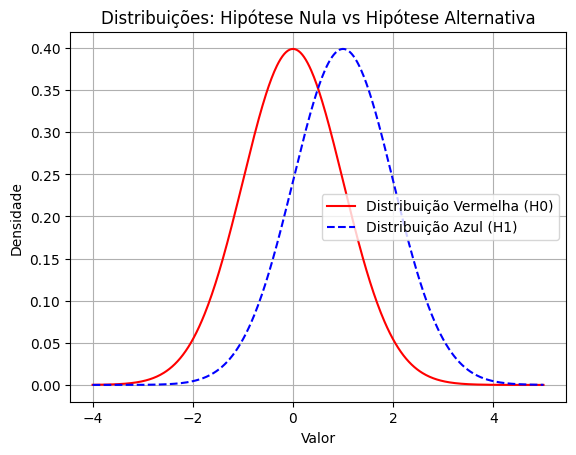

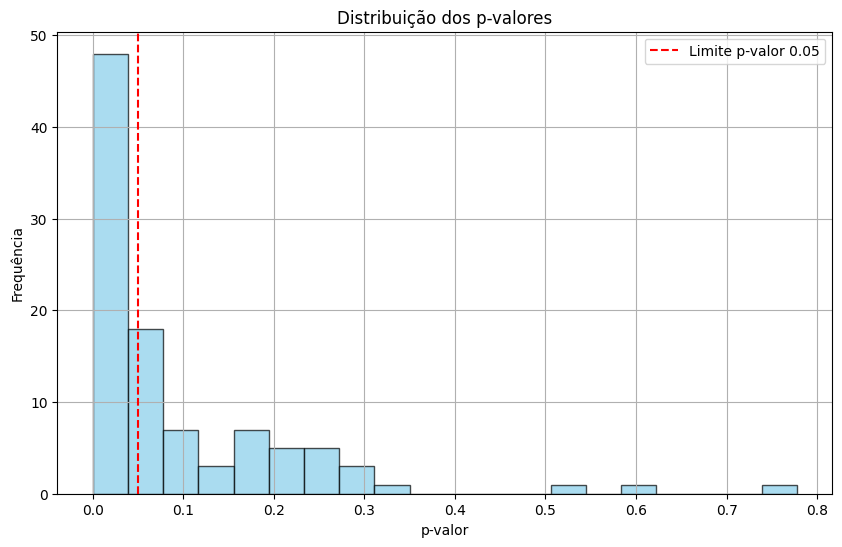

Sequência 1: Média = 1.34, p-valor = 0.01036
Sequência 2: Média = 1.35, p-valor = 0.00962
Sequência 3: Média = 1.63, p-valor = 0.00243
Sequência 4: Média = 0.87, p-valor = 0.06567
Sequência 5: Média = -0.13, p-valor = 0.59047


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Parâmetros das distribuições
media_vermelha = 0  # média da distribuição vermelha (H0)
media_azul = 1     # média da distribuição azul (H1)
desvio_padrao = 1  # desvio padrão das distribuições

# 2. Gerar 100 sequências de 3 valores da distribuição azul
np.random.seed(42)  # para resultados reprodutíveis
num_sequencias = 100
tamanho_sequencia = 3

sequencias_azul = np.random.normal(loc=media_azul, scale=desvio_padrao, size=(num_sequencias, tamanho_sequencia))
medias_sequencias = np.mean(sequencias_azul, axis=1)

# 3. Calcular os p-valores com base na distribuição vermelha (H0)
desvio_padrao_amostral = desvio_padrao / np.sqrt(tamanho_sequencia)
p_values = 1 - norm.cdf(medias_sequencias, loc=media_vermelha, scale=desvio_padrao_amostral)

# 4. Calcular a taxa de falsos negativos (p-valor > 0.05)
falsos_negativos = np.sum(p_values > 0.05)
taxa_falsos_negativos = falsos_negativos / num_sequencias

# 5. Exibir a taxa de falsos negativos
print(f"Taxa de falsos negativos: {taxa_falsos_negativos:.2%}")

# 6. Visualização da distribuição vermelha e azul
x = np.linspace(-4, 5, 500)
plt.plot(x, norm.pdf(x, loc=media_vermelha, scale=desvio_padrao), 'r-', label='Distribuição Vermelha (H0)')
plt.plot(x, norm.pdf(x, loc=media_azul, scale=desvio_padrao), 'b--', label='Distribuição Azul (H1)')
plt.title('Distribuições: Hipótese Nula vs Hipótese Alternativa')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

# 7. Visualizar p-valores para cada sequência sorteada
plt.figure(figsize=(10,6))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0.05, color='red', linestyle='--', label='Limite p-valor 0.05')
plt.title('Distribuição dos p-valores')
plt.xlabel('p-valor')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

# 8. Mostrar as médias das sequências e seus p-valores
for i in range(5):  # Mostrar as 5 primeiras sequências e seus p-valores
    print(f"Sequência {i+1}: Média = {medias_sequencias[i]:.2f}, p-valor = {p_values[i]:.5f}")


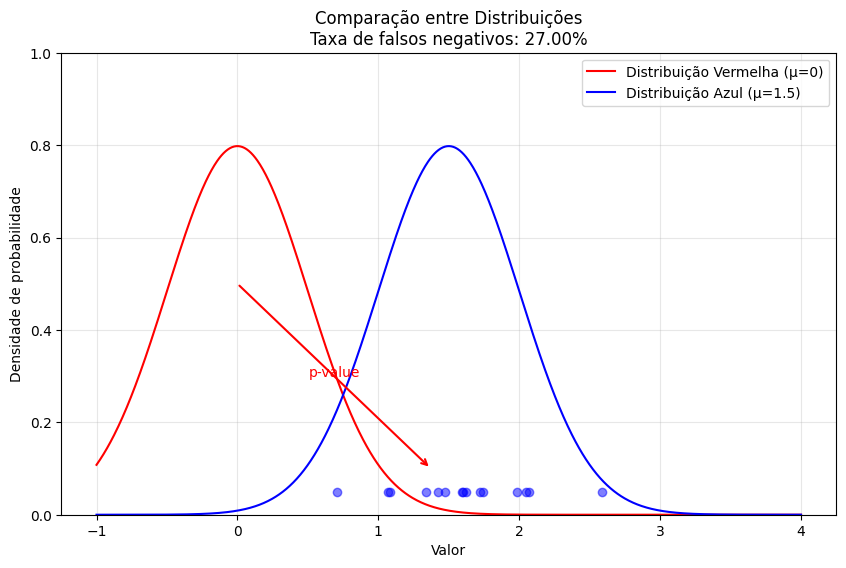

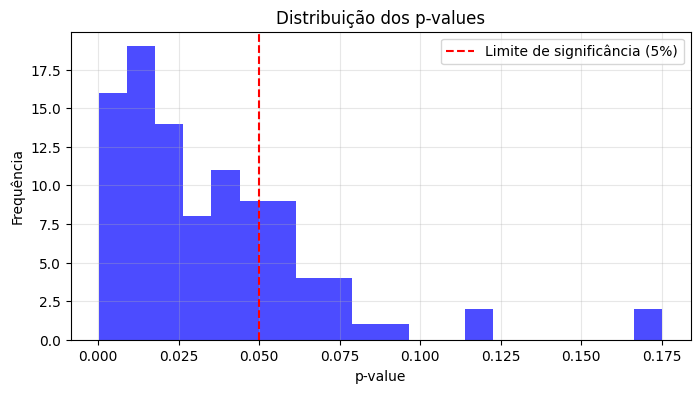


Resultados:
Total de amostras: 100
Falsos negativos (p > 0.05): 27
Taxa de falsos negativos: 27.00%


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_1samp

# Configuração das distribuições
mu_azul = 1.5    # Média da distribuição azul
mu_vermelha = 0 # Média da distribuição vermelha
sigma = 0.5      # Desvio padrão (igual para ambas)
n_amostras = 100 # Número de sequências
tamanho_amostra = 3 # Tamanho de cada sequência

# Gerar as distribuições teóricas
x = np.linspace(-1, 4, 1000)
y_azul = norm.pdf(x, mu_azul, sigma)
y_vermelha = norm.pdf(x, mu_vermelha, sigma)

# Plotar as distribuições
plt.figure(figsize=(10, 6))
plt.plot(x, y_vermelha, 'r-', label='Distribuição Vermelha (μ=0)')
plt.plot(x, y_azul, 'b-', label='Distribuição Azul (μ=1.5)')

# Simular as amostras e calcular p-values
p_values = []
falsos_negativos = 0

for i in range(n_amostras):
    # Sortear uma sequência da distribuição azul
    amostra = np.random.normal(mu_azul, sigma, tamanho_amostra)
    
    # Calcular p-value em relação à distribuição vermelha
    _, p_value = ttest_1samp(amostra, mu_vermelha)
    p_values.append(p_value)
    
    # Verificar se é falso negativo (p > 0.05)
    if p_value > 0.05:
        falsos_negativos += 1
        
    # Plotar a amostra (apenas as primeiras 5 para não poluir o gráfico)
    if i < 5:
        plt.plot(amostra, [0.050]*tamanho_amostra, 'bo', alpha=0.5)
        # Seta indicando a comparação (para a primeira amostra)
        if i == 0:
            plt.annotate('', xy=(amostra.mean(), 0.1), xytext=(mu_vermelha, 0.5),
                        arrowprops=dict(arrowstyle='->', color='red', lw=1.5))
            plt.text((amostra.mean()+mu_vermelha)/2, 0.3, 'p-value', color='red', ha='center')

# Calcular taxa de falsos negativos
taxa_fn = falsos_negativos / n_amostras

# Configurações do gráfico
plt.title(f'Comparação entre Distribuições\nTaxa de falsos negativos: {taxa_fn:.2%}')
plt.xlabel('Valor')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

# Histograma dos p-values
plt.figure(figsize=(8, 4))
plt.hist(p_values, bins=20, color='blue', alpha=0.7)
plt.axvline(0.05, color='red', linestyle='--', label='Limite de significância (5%)')
plt.title('Distribuição dos p-values')
plt.xlabel('p-value')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nResultados:")
print(f"Total de amostras: {n_amostras}")
print(f"Falsos negativos (p > 0.05): {falsos_negativos}")
print(f"Taxa de falsos negativos: {taxa_fn:.2%}")

Para amostra 5.81931154042998º [1.70479788 1.90914092 2.91484066] -> media 2.1762598209611554 -> 0.02828277082395144
Para amostra 4.628129905707962º [0.62580073 1.3881529  1.04730985] -> media 1.0204211591300014 -> 0.04365205315239827
Para amostra 2.0627903257658957º [0.33213469 1.17162474 2.6077211 ] -> media 1.3704935097579787 -> 0.1752205701587758
Para amostra 12.626724763467655º [2.06660215 2.1443105  1.64647561] -> media 1.952462753384748 -> 0.0062137806506390135
Para amostra 3.3757770811002787º [2.02332378 0.69940966 1.19049011] -> media 1.304407851484418 -> 0.07766586142402067
Para amostra 46.78760210709012º [1.69200424 1.77751586 1.82018785] -> media 1.7632359835908133 -> 0.0004565001890229427
Para amostra 2.087135602220563º [1.36166472 1.1225766  4.65777128] -> media 2.38067086663253 -> 0.17214531826573296
Para amostra 5.641939522752694º [2.40678727 1.91314748 1.2667915 ] -> media 1.8622420835595426 -> 0.030008523769165605
Para amostra 6.513971470017508º [1.04878117 1.36919941

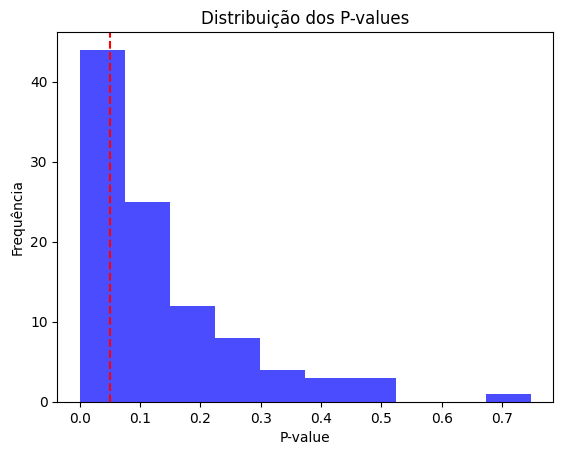

In [35]:
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Parâmetros das distribuições
media_azul = 1.5
media_vermelha = 0
desvio_padrao = 1
num_amostras = 100
tamanho_amostra = 3

# Simulação
falsos_negativos = 0
p_values = []

for _ in range(num_amostras):
    # Gerar amostra da distribuição azul
    amostra = np.random.normal(media_azul, desvio_padrao, tamanho_amostra)
    # Teste t para comparar com a média vermelha
    _, p = ttest_1samp(amostra, media_vermelha)
    print(f"Para amostra {_}º {amostra} -> media {np.mean(amostra)} -> {p}")
    p_values.append(p)
    
    # Contar falsos negativos (p > 0.05)
    if p > 0.05:
        falsos_negativos += 1

print(f"falso negativo {falsos_negativos} e Nº de amostras {num_amostras}")

# Resultados
taxa_fn = falsos_negativos / num_amostras
print(f"Taxa de falsos negativos: {taxa_fn:.1%}")

# Gráfico simples dos p-values
plt.hist(p_values, bins=10, color='blue', alpha=0.7)
plt.axvline(0.05, color='red', linestyle='--')
plt.title("Distribuição dos P-values")
plt.xlabel("P-value")
plt.ylabel("Frequência")
plt.show()


Amostra 1: [1.46167616 2.31876597 2.60677452]
Média amostral: 2.13
Estatística t calculada: 6.1910
P-value (manual): 0.0251
P-value (scipy): 0.0251

Amostra 2: [ 1.91478446  0.53660366 -0.43206516]
Média amostral: 0.67
Estatística t calculada: 0.9885
P-value (manual): 0.4271
P-value (scipy): 0.4271

Amostra 3: [-0.2568687   0.23101742  0.6111403 ]
Média amostral: 0.20
Estatística t calculada: 0.7766
P-value (manual): 0.5187
P-value (scipy): 0.5187

Amostra 4: [1.3402515  0.48583578 1.83897589]
Média amostral: 1.22
Estatística t calculada: 3.0922
P-value (manual): 0.0906
P-value (scipy): 0.0906

Amostra 5: [1.2677265  1.51054571 2.64025055]
Média amostral: 1.81
Estatística t calculada: 4.2710
P-value (manual): 0.0507
P-value (scipy): 0.0507

Resultados finais:
Falsos negativos: 69/100
Taxa de falsos negativos: 69.0%


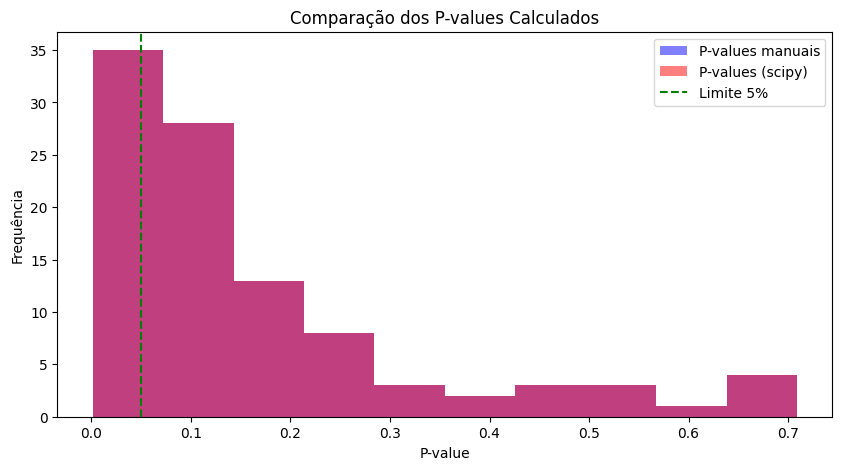

In [33]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Parâmetros das distribuições
media_azul = 1.5    # Média da distribuição azul (H1)
media_vermelha = 0   # Média da distribuição vermelha (H0)
desvio_padrao = 1    # Desvio padrão conhecido
num_amostras = 100   # Número de amostras
tamanho_amostra = 3  # Tamanho de cada amostra

# Função para calcular o p-value manualmente
def calcular_p_value_manual(amostra, mu0=media_vermelha):
    n = len(amostra)
    media_amostra = np.mean(amostra)
    desvio_amostra = np.std(amostra, ddof=1)  # ddof=1 para desvio padrão amostral
    
    # Calcular a estatística t manualmente
    t_stat = (media_amostra - mu0) / (desvio_amostra / np.sqrt(n))
    
    # Calcular o p-value bilateral
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
    
    return t_stat, p_value

# Simulação
falsos_negativos = 0
p_values_manual = []
p_values_scipy = []

for i in range(num_amostras):
    # Gerar amostra da distribuição azul
    amostra = np.random.normal(media_azul, desvio_padrao, tamanho_amostra)
    
    # Calcular p-value de duas formas
    t_stat, p_manual = calcular_p_value_manual(amostra)
    _, p_scipy = ttest_1samp(amostra, media_vermelha)
    
    # Armazenar resultados
    p_values_manual.append(p_manual)
    p_values_scipy.append(p_scipy)
    
    # Comparar os dois métodos (apenas para as primeiras 5 amostras)
    if i < 5:
        print(f"\nAmostra {i+1}: {amostra}")
        print(f"Média amostral: {np.mean(amostra):.2f}")
        print(f"Estatística t calculada: {t_stat:.4f}")
        print(f"P-value (manual): {p_manual:.4f}")
        print(f"P-value (scipy): {p_scipy:.4f}")
    
    # Contar falsos negativos
    if p_manual > 0.05:
        falsos_negativos += 1

# Resultados
taxa_fn = falsos_negativos / num_amostras
print(f"\nResultados finais:")
print(f"Falsos negativos: {falsos_negativos}/{num_amostras}")
print(f"Taxa de falsos negativos: {taxa_fn:.1%}")

# Gráfico comparativo
plt.figure(figsize=(10, 5))
plt.hist(p_values_manual, bins=10, color='blue', alpha=0.5, label='P-values manuais')
plt.hist(p_values_scipy, bins=10, color='red', alpha=0.5, label='P-values (scipy)')
plt.axvline(0.05, color='green', linestyle='--', label='Limite 5%')
plt.title("Comparação dos P-values Calculados")
plt.xlabel("P-value")
plt.ylabel("Frequência")
plt.legend()
plt.show()